164402 - Andrey Vinicius Santos Souza


🔧 Derivada automática de f(x): f'(x) = -8.0*exp(-0.1*x)

Iter |     x_n     |   f(x_n)   |  x_(n+1)   | εa (%)   | Erro real (%)
   0 |   1.0000000 | -2.6130066 |  0.6390226 |  56.4890 |           nan
   1 |   0.6390226 |  0.0477344 |  0.6453832 |   0.9855 |           nan
   2 |   0.6453832 |  0.0000152 |  0.6453852 |   0.0003 |           nan
   3 |   0.6453852 |  0.0000000 |  0.6453852 |   0.0000 |           nan

✅ Convergiu para x ≈ 0.64538521 com erro aproximado de 0.0000%


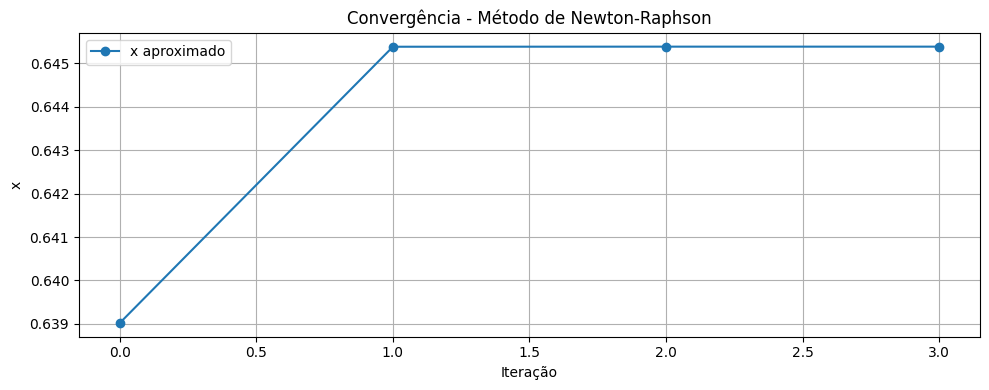

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# === GERA f(x) e f'(x) A PARTIR DE STRING ===
def gerar_funcoes(expr):
    x = sp.Symbol('x')
    f_sym = sp.sympify(expr)
    df_sym = sp.diff(f_sym, x)

    f_lambda = sp.lambdify(x, f_sym, modules=["math"])
    df_lambda = sp.lambdify(x, df_sym, modules=["math"])

    print(f"\n🔧 Derivada automática de f(x): f'(x) = {df_sym}")
    return f_lambda, df_lambda, str(df_sym)

# === MÉTODO DE NEWTON-RAPHSON ===
def newton_raphson_auto(f_expr, x0, tol_percent, max_iter, raiz_verdadeira=None):
    f, df, df_expr_str = gerar_funcoes(f_expr)

    iteracoes = []
    valores_x = []
    erros_aprox = []
    erros_reais = []

    print("\nIter |     x_n     |   f(x_n)   |  x_(n+1)   | εa (%)   | Erro real (%)")
    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)

        if dfx == 0:
            print(f"⚠️ Derivada nula em x = {x0:.6f}, parada!")
            break

        x1 = x0 - fx / dfx
        erro_aprox = abs((x1 - x0) / x1) * 100 if x1 != 0 else float('inf')
        erro_real = abs((raiz_verdadeira - x1) / raiz_verdadeira) * 100 if raiz_verdadeira else float('nan')

        print(f"{i:4d} | {x0:11.7f} | {fx:10.7f} | {x1:10.7f} | {erro_aprox:8.4f} | {erro_real:13.4f}")

        iteracoes.append(i)
        valores_x.append(x1)
        erros_aprox.append(erro_aprox)
        erros_reais.append(erro_real)

        if erro_aprox < tol_percent:
            print(f"\n✅ Convergiu para x ≈ {x1:.8f} com erro aproximado de {erro_aprox:.4f}%")
            break

        x0 = x1

    # Gráfico da convergência
    plt.figure(figsize=(10, 4))
    plt.plot(iteracoes, valores_x, marker='o', label='x aproximado')
    if raiz_verdadeira:
        plt.axhline(raiz_verdadeira, color='red', linestyle='--', label='x verdadeiro')
    plt.title("Convergência - Método de Newton-Raphson")
    plt.xlabel("Iteração")
    plt.ylabel("x")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gráfico do erro real
    if raiz_verdadeira:
        plt.figure(figsize=(10, 4))
        plt.plot(iteracoes, erros_reais, marker='x', color='orange', label='Erro real (%)')
        plt.axhline(tol_percent, color='gray', linestyle='--', label=f'Tolerância {tol_percent}%')
        plt.title("Erro Real Percentual")
        plt.xlabel("Iteração")
        plt.ylabel("Erro Real (%)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# === ENTRADA DO USUÁRIO ===
try:
    f_expr = input("Digite a função f(x) (ex: exp(-x) - x): ")
    x0 = float(input("Digite o valor inicial x₀: "))
    tol = float(input("Digite o erro percentual de parada (ex: 1 para 1%): "))
    max_iter = int(input("Digite o número máximo de iterações: "))
    raiz_input = input("Digite a raiz verdadeira (ou pressione Enter se não souber): ")
    raiz_verdadeira = float(raiz_input) if raiz_input else None

    newton_raphson_auto(f_expr, x0, tol, max_iter, raiz_verdadeira)

except Exception as e:
    print(f"\n❌ Erro: {e}")


## Encontrando o tempo em que $(T(t) = 85^\circ c )$ com o Método de Newton-Raphson

Queremos resolver a equação:

$$
T(t) = 80e^{-0.1t} + 10 = 85
$$

---

### 🔷 1. Reescrevendo a equação

Reescrevemos na forma de uma função $f(t)$:

$$
f(t) = 80e^{-0.1t} + 10 - 85 = 80e^{-0.1t} - 75
$$

Nosso objetivo é encontrar a **raiz de**:

$$
f(t) = 80e^{-0.1t} - 75
$$

---

### 🔷 2. Derivada da função

Para aplicar o método de Newton-Raphson, precisamos da derivada $f'(t)$:

$$
f'(t) = \frac{d}{dt}[80e^{-0.1t} - 75] = -8e^{-0.1t}
$$

---

### 🔷 3. Escolha do chute inicial

Sabemos que:

- $(T(0) = 90^\circ c )$
- A função $T(t)$ é decrescente
- Queremos encontrar o instante em que $(T(t) = 85^\circ c )$

Logo, um bom chute inicial é:

$$
t_0 = 1
$$

---

### ✅ Resultado final

Aplicando o **método de Newton-Raphson** com erro de parada $10^{-5}$, obtemos:

- Tempo aproximado: $\boxed{t \approx 0.64538521}$ minutos  
- Erro aproximado: $\boxed{0.0000\%}$

**Portanto, o líquido atinge $(85^\circ c)$ em aproximadamente 0,645 minutos.**
